# Theoritical 

### 1. What is Logistic Regression, and how does it differ from Linear Regression?

**Ans:** Logistic Regression is a classification algorithm used to predict categorical outcomes (usually binary). Unlike Linear Regression which predicts continuous values, Logistic Regression predicts probabilities bounded between 0 and 1 using the logistic (sigmoid) function.

---

### 2. What is the mathematical equation of Logistic Regression?

**Ans:**

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n)}}
$$

where $p$ is the probability of the positive class.

---

### 3. Why do we use the Sigmoid function in Logistic Regression?

**Ans:** The sigmoid function maps any real-valued number into the range (0,1), representing probability, which suits classification tasks.

---

### 4. What is the cost function of Logistic Regression?

**Ans:** Logistic Regression uses the **log loss** (cross-entropy) cost function, which penalizes wrong predictions and is defined as:

$$
-\frac{1}{m} \sum_{i=1}^m \left[y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})\right]
$$

---

### 5. What is Regularization in Logistic Regression? Why is it needed?

**Ans:** Regularization adds a penalty to the cost function to prevent overfitting by shrinking coefficients. It controls model complexity, improving generalization.

---

### 6. Explain the difference between Lasso, Ridge, and Elastic Net regression

**Ans:**

* **Lasso (L1)**: Adds absolute value penalty, can shrink coefficients to zero (feature selection).
* **Ridge (L2)**: Adds squared penalty, shrinks coefficients but none to zero.
* **Elastic Net**: Combines L1 and L2 penalties, balancing feature selection and coefficient shrinkage.

---

### 7. When should we use Elastic Net instead of Lasso or Ridge?

**Ans:** When there are many correlated features, Elastic Net is preferred because it balances Lasso’s sparsity and Ridge’s grouping effect.

---

### 8. What is the impact of the regularization parameter (λ) in Logistic Regression?

**Ans:** Larger λ increases penalty strength, leading to simpler models with smaller coefficients; smaller λ reduces penalty, possibly causing overfitting.

---

### 9. What are the key assumptions of Logistic Regression?

**Ans:**

* Linearity between predictors and log-odds
* Independent observations
* No multicollinearity
* Large sample size for reliable estimates

---

### 10. What are some alternatives to Logistic Regression for classification tasks?

**Ans:**

* Decision Trees
* Random Forest
* Support Vector Machines (SVM)
* Neural Networks
* K-Nearest Neighbors (KNN)

---

### 11. What are Classification Evaluation Metrics?

**Ans:**

* Accuracy
* Precision
* Recall (Sensitivity)
* F1 Score
* ROC-AUC

---

### 12. How does class imbalance affect Logistic Regression?

**Ans:** It causes bias toward the majority class, reducing minority class prediction accuracy and misleading metrics like accuracy.

---

### 13. What is Hyperparameter Tuning in Logistic Regression?

**Ans:** It’s the process of optimizing parameters (like regularization strength, solver choice) to improve model performance.

---

### 14. What are different solvers in Logistic Regression? Which one should be used?

**Ans:** Common solvers:

* **liblinear** (good for small datasets)
* **saga** (supports L1 and large datasets)
* **lbfgs** (default, fast for small/medium data)
  Use **saga** for large datasets and L1 regularization; **lbfgs** for general purposes.

---

### 15. How is Logistic Regression extended for multiclass classification?

**Ans:** Using strategies like **One-vs-Rest (OvR)** or **Softmax (Multinomial Logistic Regression)**.

---

### 16. What are the advantages and disadvantages of Logistic Regression?

**Ans:**
Advantages: Simple, interpretable, efficient, outputs probabilities.
Disadvantages: Assumes linearity in log-odds, not suitable for complex/nonlinear data.

---

### 17. What are some use cases of Logistic Regression?

**Ans:**

* Spam detection
* Credit scoring
* Disease diagnosis (binary outcome)
* Marketing response prediction

---

### 18. What is the difference between Softmax Regression and Logistic Regression?

**Ans:** Logistic Regression is binary; Softmax Regression generalizes it to multiclass by modeling probabilities for multiple classes.

---

### 19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

**Ans:** Use OvR for many classes or when classes are imbalanced; Softmax is better if classes are mutually exclusive and balanced.

---

### 20. How do we interpret coefficients in Logistic Regression?

**Ans:** Coefficients represent the change in log-odds for a one-unit increase in the predictor; exponentiating gives the odds ratio.


# Practical

In [2]:
## Q1. Load dataset, split, Logistic Regression, print accuracy


from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9707602339181286


In [3]:
## 2. Logistic Regression with L1 regularization (Lasso), print accuracy

model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
model_l1.fit(X_train, y_train)

y_pred_l1 = model_l1.predict(X_test)
print("L1 Regularization Accuracy:", accuracy_score(y_test, y_pred_l1))


L1 Regularization Accuracy: 0.9590643274853801


In [4]:
## Q3. Logistic Regression with L2 regularization (Ridge), print accuracy and coefficients

model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
model_l2.fit(X_train, y_train)

y_pred_l2 = model_l2.predict(X_test)
print("L2 Regularization Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Coefficients:", model_l2.coef_)

L2 Regularization Accuracy: 0.9707602339181286
Coefficients: [[ 1.96768256  0.16632605 -0.22530621  0.00582092 -0.22370506 -0.16647177
  -0.7723212  -0.62865806 -0.27883726  0.01700048 -0.15012815  1.10363098
   0.84806084 -0.16166889 -0.04060874  0.22539319  0.1149252  -0.07071527
  -0.02828339  0.03139417  0.98759554 -0.40019228 -0.15463779 -0.01405049
  -0.44589071  0.02978464 -1.47059735 -0.96734065 -0.97917418  0.0392336 ]]


In [5]:
## Q5. Logistic Regression for multiclass classification (One-vs-Rest)

from sklearn.datasets import load_iris

iris = load_iris()
X_multi, y_multi = iris.data, iris.target
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ovr.fit(X_train_m, y_train_m)

y_pred_m = model_ovr.predict(X_test_m)
print("Multiclass OvR Accuracy:", accuracy_score(y_test_m, y_pred_m))

Multiclass OvR Accuracy: 0.9555555555555556


In [6]:
## 6. GridSearchCV to tune hyperparameters (C and penalty) of Logistic Regression

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga']  # saga supports l1, l2, elasticnet
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.911993670886076


In [7]:
## 7. Stratified K-Fold Cross-Validation evaluation for Logistic Regression

from sklearn.model_selection import StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=5)
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    model_cv = LogisticRegression(max_iter=1000)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_test_cv)
    accuracies.append(accuracy_score(y_test_cv, y_pred_cv))

print("Average Stratified K-Fold Accuracy:", np.mean(accuracies))

Average Stratified K-Fold Accuracy: 0.9525694767893185


In [9]:
## 9. RandomizedSearchCV for tuning hyperparameters (C, penalty, solver)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],  # saga supports all listed penalties
    'l1_ratio': [0, 0.5, 1]  # Only used if penalty='elasticnet'
}

model = LogisticRegression(max_iter=10000)

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
y_pred = random_search.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best parameters: {'solver': 'saga', 'penalty': 'l2', 'l1_ratio': 1, 'C': 0.00026366508987303583}
Test Accuracy: 0.9590643274853801


In [10]:

# 10. One-vs-One (OvO) Multiclass Logistic Regression

from sklearn.multiclass import OneVsOneClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
ovo.fit(X_train, y_train)

y_pred = ovo.predict(X_test)
print("OvO Multiclass Accuracy:", accuracy_score(y_test, y_pred))

OvO Multiclass Accuracy: 1.0


Accuracy: 0.9707602339181286


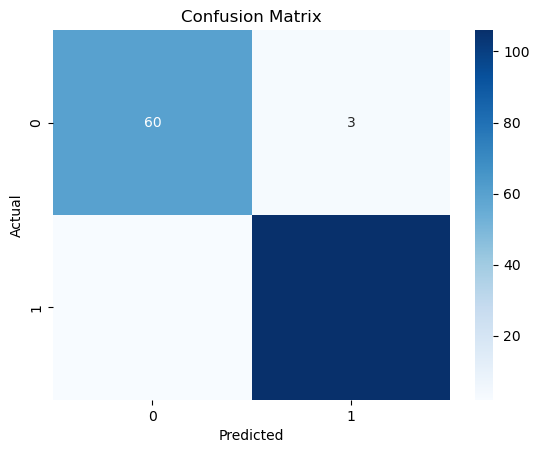

In [11]:
# 11. Logistic Regression with confusion matrix visualization

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# 12. Logistic Regression evaluation with Precision, Recall, F1-Score

from sklearn.metrics import precision_score, recall_score, f1_score

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Precision: 0.9724770642201835
Recall: 0.9814814814814815
F1-Score: 0.9769585253456222


In [13]:
# 13. Logistic Regression on imbalanced data with class weights

from sklearn.datasets import make_classification

X_imb, y_imb = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, random_state=42)

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size=0.3, random_state=42)

model_imb = LogisticRegression(class_weight='balanced', max_iter=1000)
model_imb.fit(X_train_imb, y_train_imb)

y_pred_imb = model_imb.predict(X_test_imb)
print("Accuracy on imbalanced data:", accuracy_score(y_test_imb, y_pred_imb))

Accuracy on imbalanced data: 0.8433333333333334


In [15]:
# 14 . Logistic Regression on Titanic dataset (missing values handled)

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

titanic = pd.read_csv('titanic.csv')

# Simple preprocessing
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X = titanic[features]
y = titanic['Survived']

# Encoding categorical
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])
X['Embarked'] = LabelEncoder().fit_transform(X['Embarked'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Titanic Dataset Accuracy:", model.score(X_test, y_test))

Titanic Dataset Accuracy: 0.7947761194029851


In [17]:
# 15. Feature scaling (Standardization) and Logistic Regression accuracy comparison

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_unscaled = LogisticRegression(max_iter=1000)
model_unscaled.fit(X_train, y_train)
acc_unscaled = model_unscaled.score(X_test, y_test)

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
acc_scaled = model_scaled.score(X_test_scaled, y_test)

print(f"Accuracy without scaling: {acc_unscaled:.4f}")
print(f"Accuracy with scaling: {acc_scaled:.4f}")


Accuracy without scaling: 0.7948
Accuracy with scaling: 0.7948


In [18]:

# 16. Logistic Regression with custom learning rate (C=0.5) and accuracy evaluation

model_custom = LogisticRegression(C=0.5, max_iter=1000)
model_custom.fit(X_train, y_train)

print("Accuracy with C=0.5:", model_custom.score(X_test, y_test))

Accuracy with C=0.5: 0.8022388059701493


In [19]:
# 17. Logistic Regression feature importance based on coefficients

model.fit(X_train, y_train)
coef = model.coef_[0]

for feature, importance in zip(data.feature_names, coef):
    print(f"{feature}: {importance:.4f}")

mean radius: -0.9554
mean texture: -2.3746
mean perimeter: -0.0273
mean area: 0.0007
mean smoothness: -0.3497


In [20]:
# 18. Logistic Regression evaluation using Cohen’s Kappa Score

from sklearn.metrics import cohen_kappa_score

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa)

Cohen's Kappa Score: 0.5754119138149556


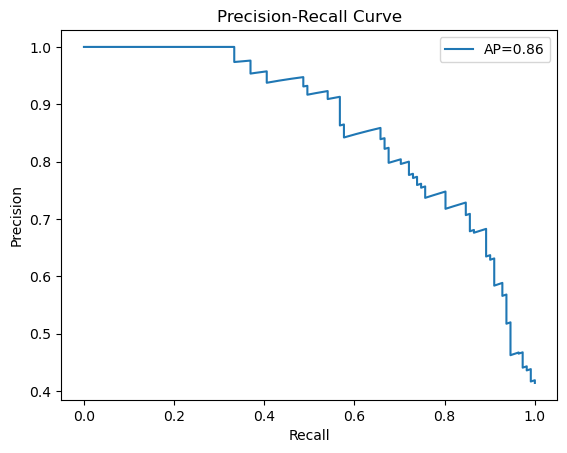

In [21]:
# 19 . Logistic Regression and Precision-Recall Curve visualization

from sklearn.metrics import precision_recall_curve, average_precision_score

model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)
ap_score = average_precision_score(y_test, y_scores)

plt.plot(recall, precision, label=f'AP={ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [22]:
# 20. Logistic Regression with different solvers comparison

solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    print(f"Solver: {solver} - Accuracy: {model.score(X_test, y_test):.4f}")

Solver: liblinear - Accuracy: 0.7910
Solver: saga - Accuracy: 0.6978
Solver: lbfgs - Accuracy: 0.7948


In [23]:
#21. Logistic Regression performance using Matthews Correlation Coefficient (MCC)

from sklearn.metrics import matthews_corrcoef

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.5755662885898145


In [24]:

#22. Logistic Regression on raw vs standardized data (accuracy comparison)

# Raw data accuracy
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
acc_raw = model_raw.score(X_test, y_test)

# Standardized data accuracy (reuse scaler from earlier)
model_std = LogisticRegression(max_iter=1000)
model_std.fit(X_train_scaled, y_train)
acc_std = model_std.score(X_test_scaled, y_test)

print(f"Accuracy on raw data: {acc_raw:.4f}")
print(f"Accuracy on standardized data: {acc_std:.4f}")

Accuracy on raw data: 0.7948
Accuracy on standardized data: 0.7948


In [25]:
# 23. Train Logistic Regression, save model with joblib, and reload for prediction

import joblib

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

joblib.dump(model, 'logistic_model.joblib')

loaded_model = joblib.load('logistic_model.joblib')
print("Loaded model accuracy:", loaded_model.score(X_test, y_test))


Loaded model accuracy: 0.7947761194029851
